In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Problem 1: Linear Least-Squares

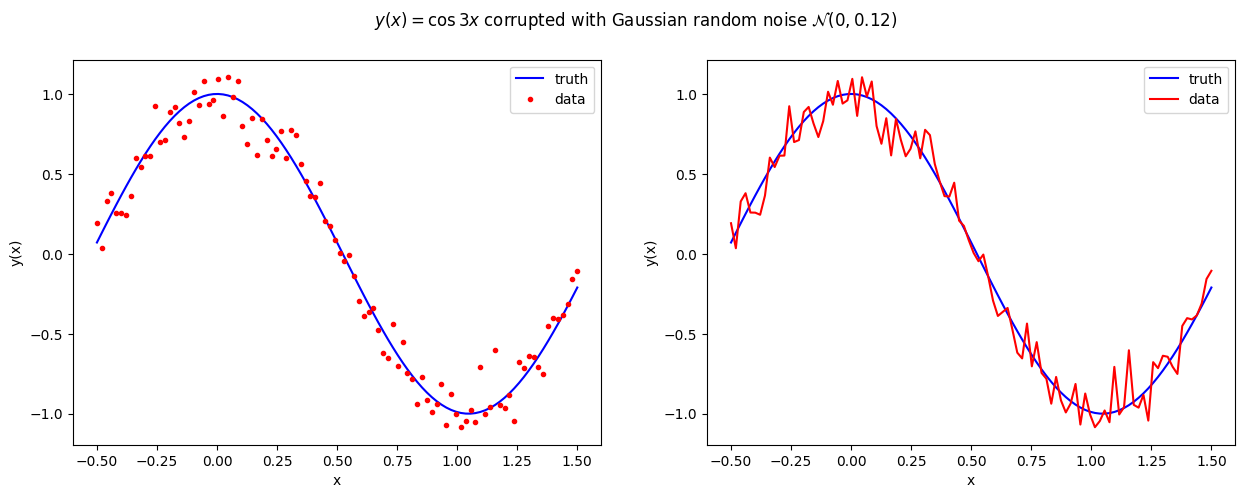

In [26]:
# Data
x = np.linspace(-0.5,1.5,100)
noise = np.random.normal(0,0.12,len(x))
yTrue = np.cos(3*x)
yMeas = yTrue + noise

# Least squares matrix
A1 = np.vstack([np.ones_like(x), x, 2*x**2-1, 4*x**3-3*x]).T
A2 = np.vstack([np.cos(x)**2, 1-2*np.sin(x), np.cos(3*x)*np.sin(x),(3-x)/(3+x)]).T
# Coefficients
c1 = np.linalg.pinv(A1) @ yMeas
c2 = np.linalg.pinv(A2) @ yMeas
# Fitted curves
yHat1 = A1 @ c1
yHat2 = A2 @ c2

# Plot
fig1, ax1 = plt.subplots(1,2, figsize=(15,5))

ax1[0].plot(x,yTrue,'b-',label='truth')
ax1[0].plot(x,yMeas,'r.',label='data')
ax1[0].set_xlabel('x')
ax1[0].set_ylabel('y(x)')
ax1[0].legend()

ax1[1].plot(x,yTrue,'b-',label='truth')
ax1[1].plot(x,yMeas,'r-',label='data')
ax1[1].set_xlabel('x')
ax1[1].set_ylabel('y(x)')
ax1[1].legend()

fig1.suptitle(r'$y(x) = \cos{3x}$ corrupted with Gaussian random noise $\mathcal{N}(0,0.12)$')
plt.show()

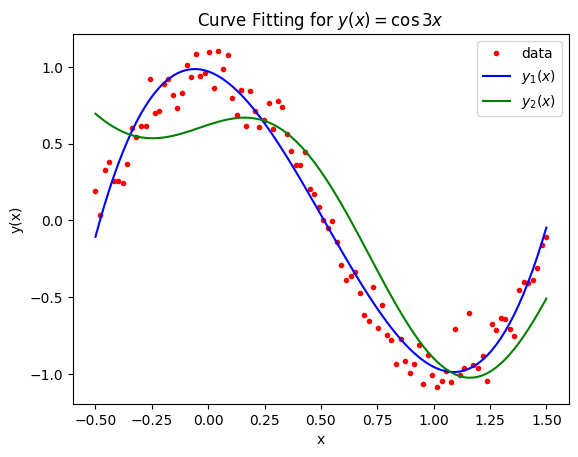

In [27]:
plt.plot(x,yMeas,'r.',label='data')
plt.plot(x,yHat1,'b-',label=r'$y_1(x)$')
plt.plot(x,yHat2,'g-',label=r'$y_2(x)$')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title(r'Curve Fitting for $y(x)=\cos{3x}$')
plt.legend()
plt.show()

In [28]:
L1_fit1 = np.linalg.norm(abs(yTrue - yHat1),1)
L1_fit2 = np.linalg.norm(abs(yTrue - yHat2),1)

L2_fit1 = np.linalg.norm(abs(yTrue - yHat1),2)
L2_fit2 = np.linalg.norm(abs(yTrue - yHat2),2)

Linf_fit1 = np.linalg.norm(abs(yTrue - yHat1),np.inf)
Linf_fit2 = np.linalg.norm(abs(yTrue - yHat2),np.inf)

print('L1 Norm')
print('==============')
print(f'y1: {L1_fit1:0.5f}')
print(f'y2: {L1_fit2:0.5f}\n')

print('L2 Norm')
print('==============')
print(f'y1: {L2_fit1:0.5f}')
print(f'y2: {L2_fit2:0.5f}\n')

print('L-inf Norm')
print('==============')
print(f'y1: {Linf_fit1:0.5f}')
print(f'y2: {Linf_fit2:0.5f}')

L1 Norm
y1: 5.14721
y2: 22.41311

L2 Norm
y1: 0.61528
y2: 2.54834

L-inf Norm
y1: 0.17703
y2: 0.62492


# Problem 2: Weighted Least-Squares

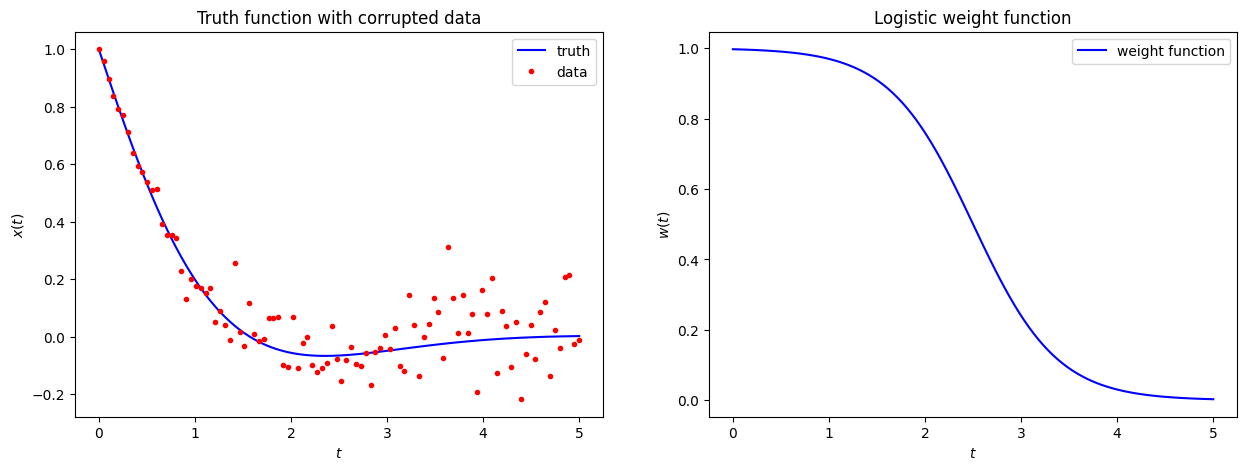

In [29]:
t = np.linspace(0,5,100)
noise = np.random.normal(0,0.05,len(t))*np.sqrt(t)
xTrue =np.exp(-t)*np.cos(t)
xMeas = xTrue + noise

def weight_func(t):
    return 1 / (1 + 0.1**(2.5-t))

fig2, ax2 = plt.subplots(1,2, figsize=(15,5))
ax2[0].plot(t,xTrue,'b-',label='truth')
ax2[0].plot(t,xMeas,'r.',label='data')
ax2[0].set_title('Truth function with corrupted data')
ax2[0].set_xlabel(r'$t$')
ax2[0].set_ylabel(r'$x(t)$')
ax2[0].legend()

ax2[1].plot(t,weight_func(t),'b-',label='weight function')
ax2[1].set_xlabel(r'$t$')
ax2[1].set_ylabel(r'$w(t)$')
ax2[1].set_title('Logistic weight function')
ax2[1].legend()

# fig2.suptitle(r'$y(x) = \cos{3x}$ corrupted with Gaussian random noise $\mathcal{N}(0,0.12)$')
plt.show()

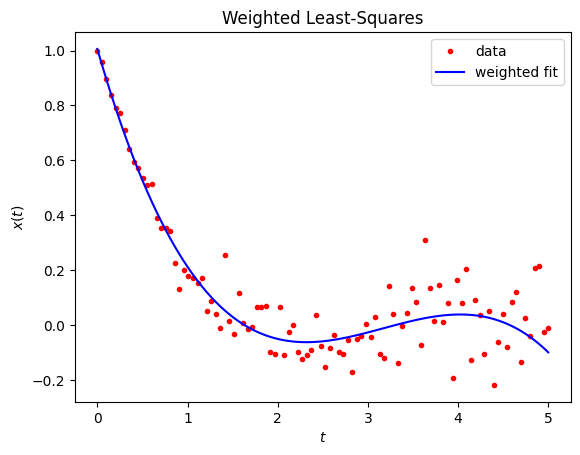

In [30]:
A = np.vstack([[np.ones_like(x), x, 2*x**2-1, 4*x**3-3*x]]).T
W = np.diag(weight_func(t))
c = np.linalg.inv(A.T @ W @ A) @ A.T @ W @ xMeas
xHat = A @ c

plt.plot(t,xMeas,'r.',label='data')
plt.plot(t,xHat,'b-',label='weighted fit')
plt.xlabel(r'$t$')
plt.ylabel(r'$x(t)$')
plt.title('Weighted Least-Squares')
plt.legend()
plt.show()

# Problem 4. Nonlinear Least-Squares

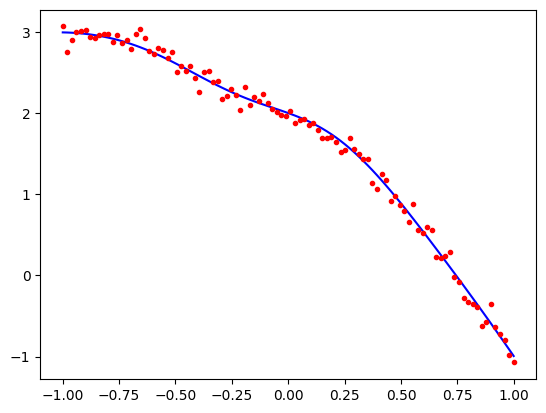

In [31]:
def y(x,C):
    return 12 - C[1]*x**2 - np.exp(-C[3]*x**2)*np.sin(C[2]*x) + C[0]*(C[1]*C[3]-C[2]*x)

def J(x,C):
    dydC0 = C[1]*C[3] - C[2]*x
    dydC1 = -x**2 + C[0]*C[3]
    dydC2 = -x*np.exp(-C[3]*x**2)*np.cos(C[2]*x) - C[0]*x
    dydC3 = x**2*np.exp(-C[3]*x**2)*np.sin(C[2]*x) + C[0]*C[1]
    return np.array([dydC0,dydC1,dydC2,dydC3],dtype=float).T

x = np.linspace(-1,1,100) # x-values
noise  = np.random.normal(0,0.1,100) # Gaussian noise
C_true = np.array([-2,1,-1,5],dtype=float) # True coefficients
y_true = y(x,C_true)
y_meas = y_true + noise

plt.plot(x,y_true,'b-',label='truth')
plt.plot(x,y_meas,'r.',label='data')
plt.show()

Iterations = 6


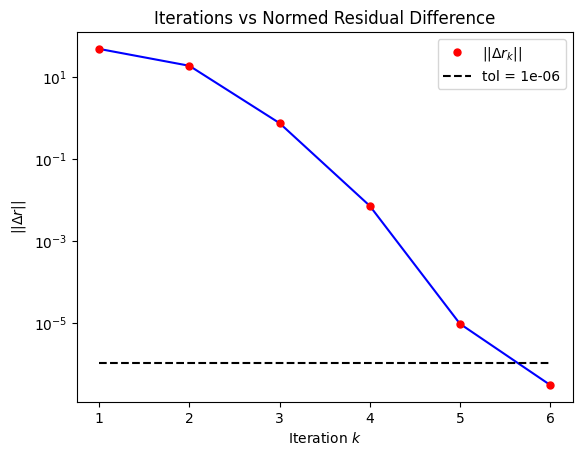

In [60]:
C_0 = np.array([-2.2, 0.3, -1, 5.2])
tol = 1e-6
maxIter = 100

res0 = y(x,C_0) - y_meas
convNormHist = np.array([])

for i in range(1,maxIter+1):
    C = C_0 - np.linalg.pinv(J(x,C_0)) @ res0
    res1 = y(x,C) - y_meas
    
    conv = abs(res1-res0)
    convNorm = np.linalg.norm(conv)
    convNormHist = np.concatenate([convNormHist,[convNorm]])

    C_0 = C
    res0 = res1
    
    if convNorm < tol:
        print(f'Iterations = {i}')
        break

iters = np.arange(1,len(convNormHist)+1)
plt.semilogy(iters,convNormHist,'b-')
plt.semilogy(iters,convNormHist,'r.',label=r'$||\Delta r_k||$',markersize=10)
plt.semilogy(iters,tol*np.ones_like(iters),'k--',label=f'tol = {tol}')
plt.xlabel(r'Iteration $k$')
plt.ylabel(r'$||\Delta r||$')
plt.title('Iterations vs Normed Residual Difference')
plt.legend()
plt.show()